# Parkinson Disease Detection 
Parkinson's disease is a progressive neurodegenerative disorder that primarily affects movement. It occurs when nerve cells in the brain that produce dopamine, a chemical messenger, become damaged and/or die, leading to impaired movement, tremors, stiffness, and balance problems. 


In [14]:
# Import  Libraries
import requests
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection 

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

In [16]:
url_content = requests.get(url=url).content
with open('data.csv' , 'wb') as f :
    f.write(url_content)

In [17]:
df = pd.read_csv("data.csv")

In [18]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [19]:
# Check shape

df.shape

(195, 24)

In [20]:
# Check Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [21]:
# Check Statistical Summary 

df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

- Here Status column is in int64 and in that on;y two values 0 & 1 so for reducing memory we convert it into unit8.

In [22]:
df['status'] = df['status'].astype('uint8')

In [23]:
df.drop(columns='name' , axis= 1 , inplace= True )

In [24]:
df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [26]:
# Check Null values 

df.isnull().sum( )

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

- NO null values in dataset 

In [27]:
# Check Duplicate Records 

df.duplicated().sum()

0

- No duplicate records availble . 

# EDA 

<Axes: xlabel='status', ylabel='count'>

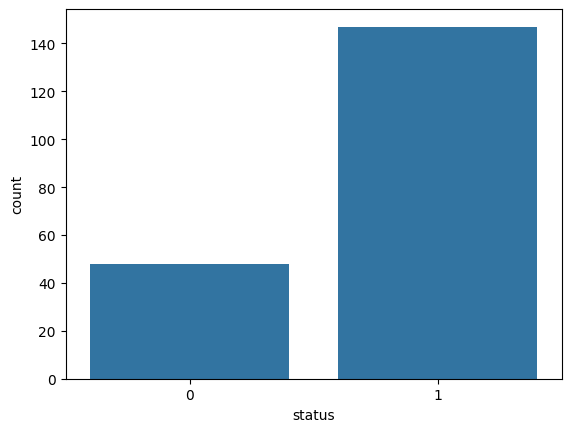

In [30]:
sns.countplot(x = 'status'  , data=df)

<Axes: >

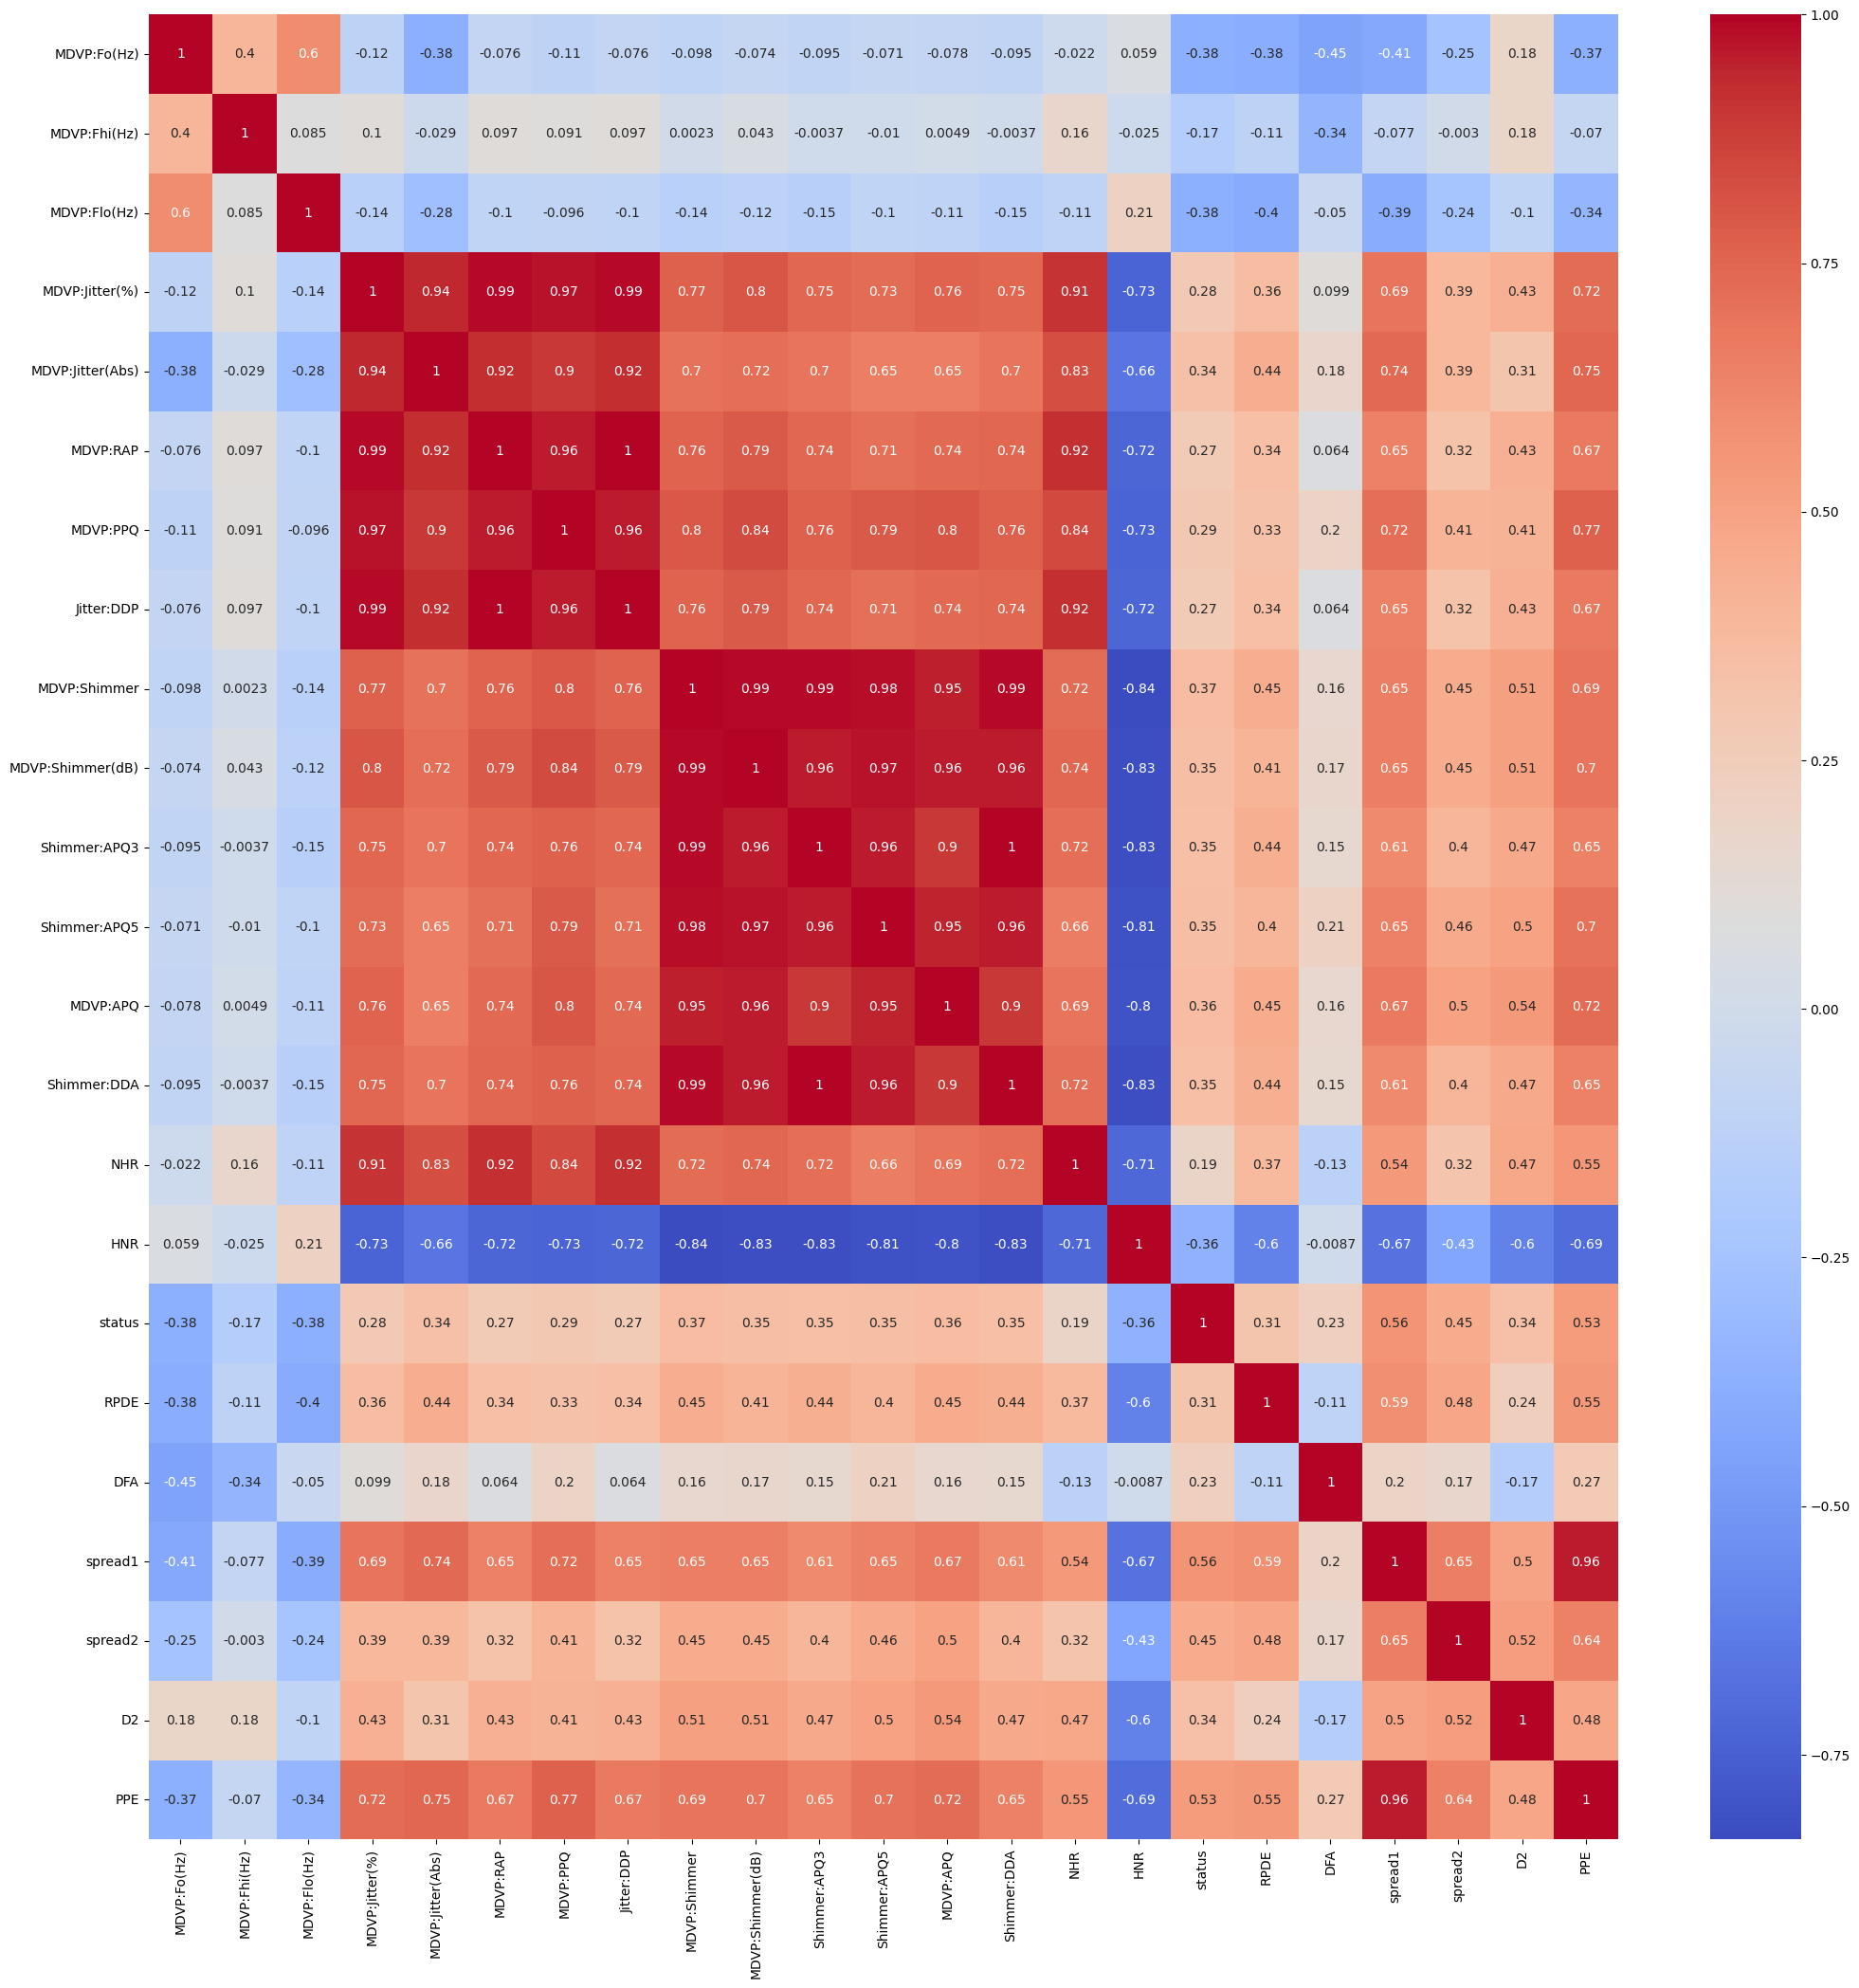

In [33]:
# Check Correlation between Features 

plt.figure(figsize=(25,25))
sns.heatmap(df.corr() , cmap='coolwarm' , annot=True )

- In this heatmap most of all features are highly correlated with each other. 

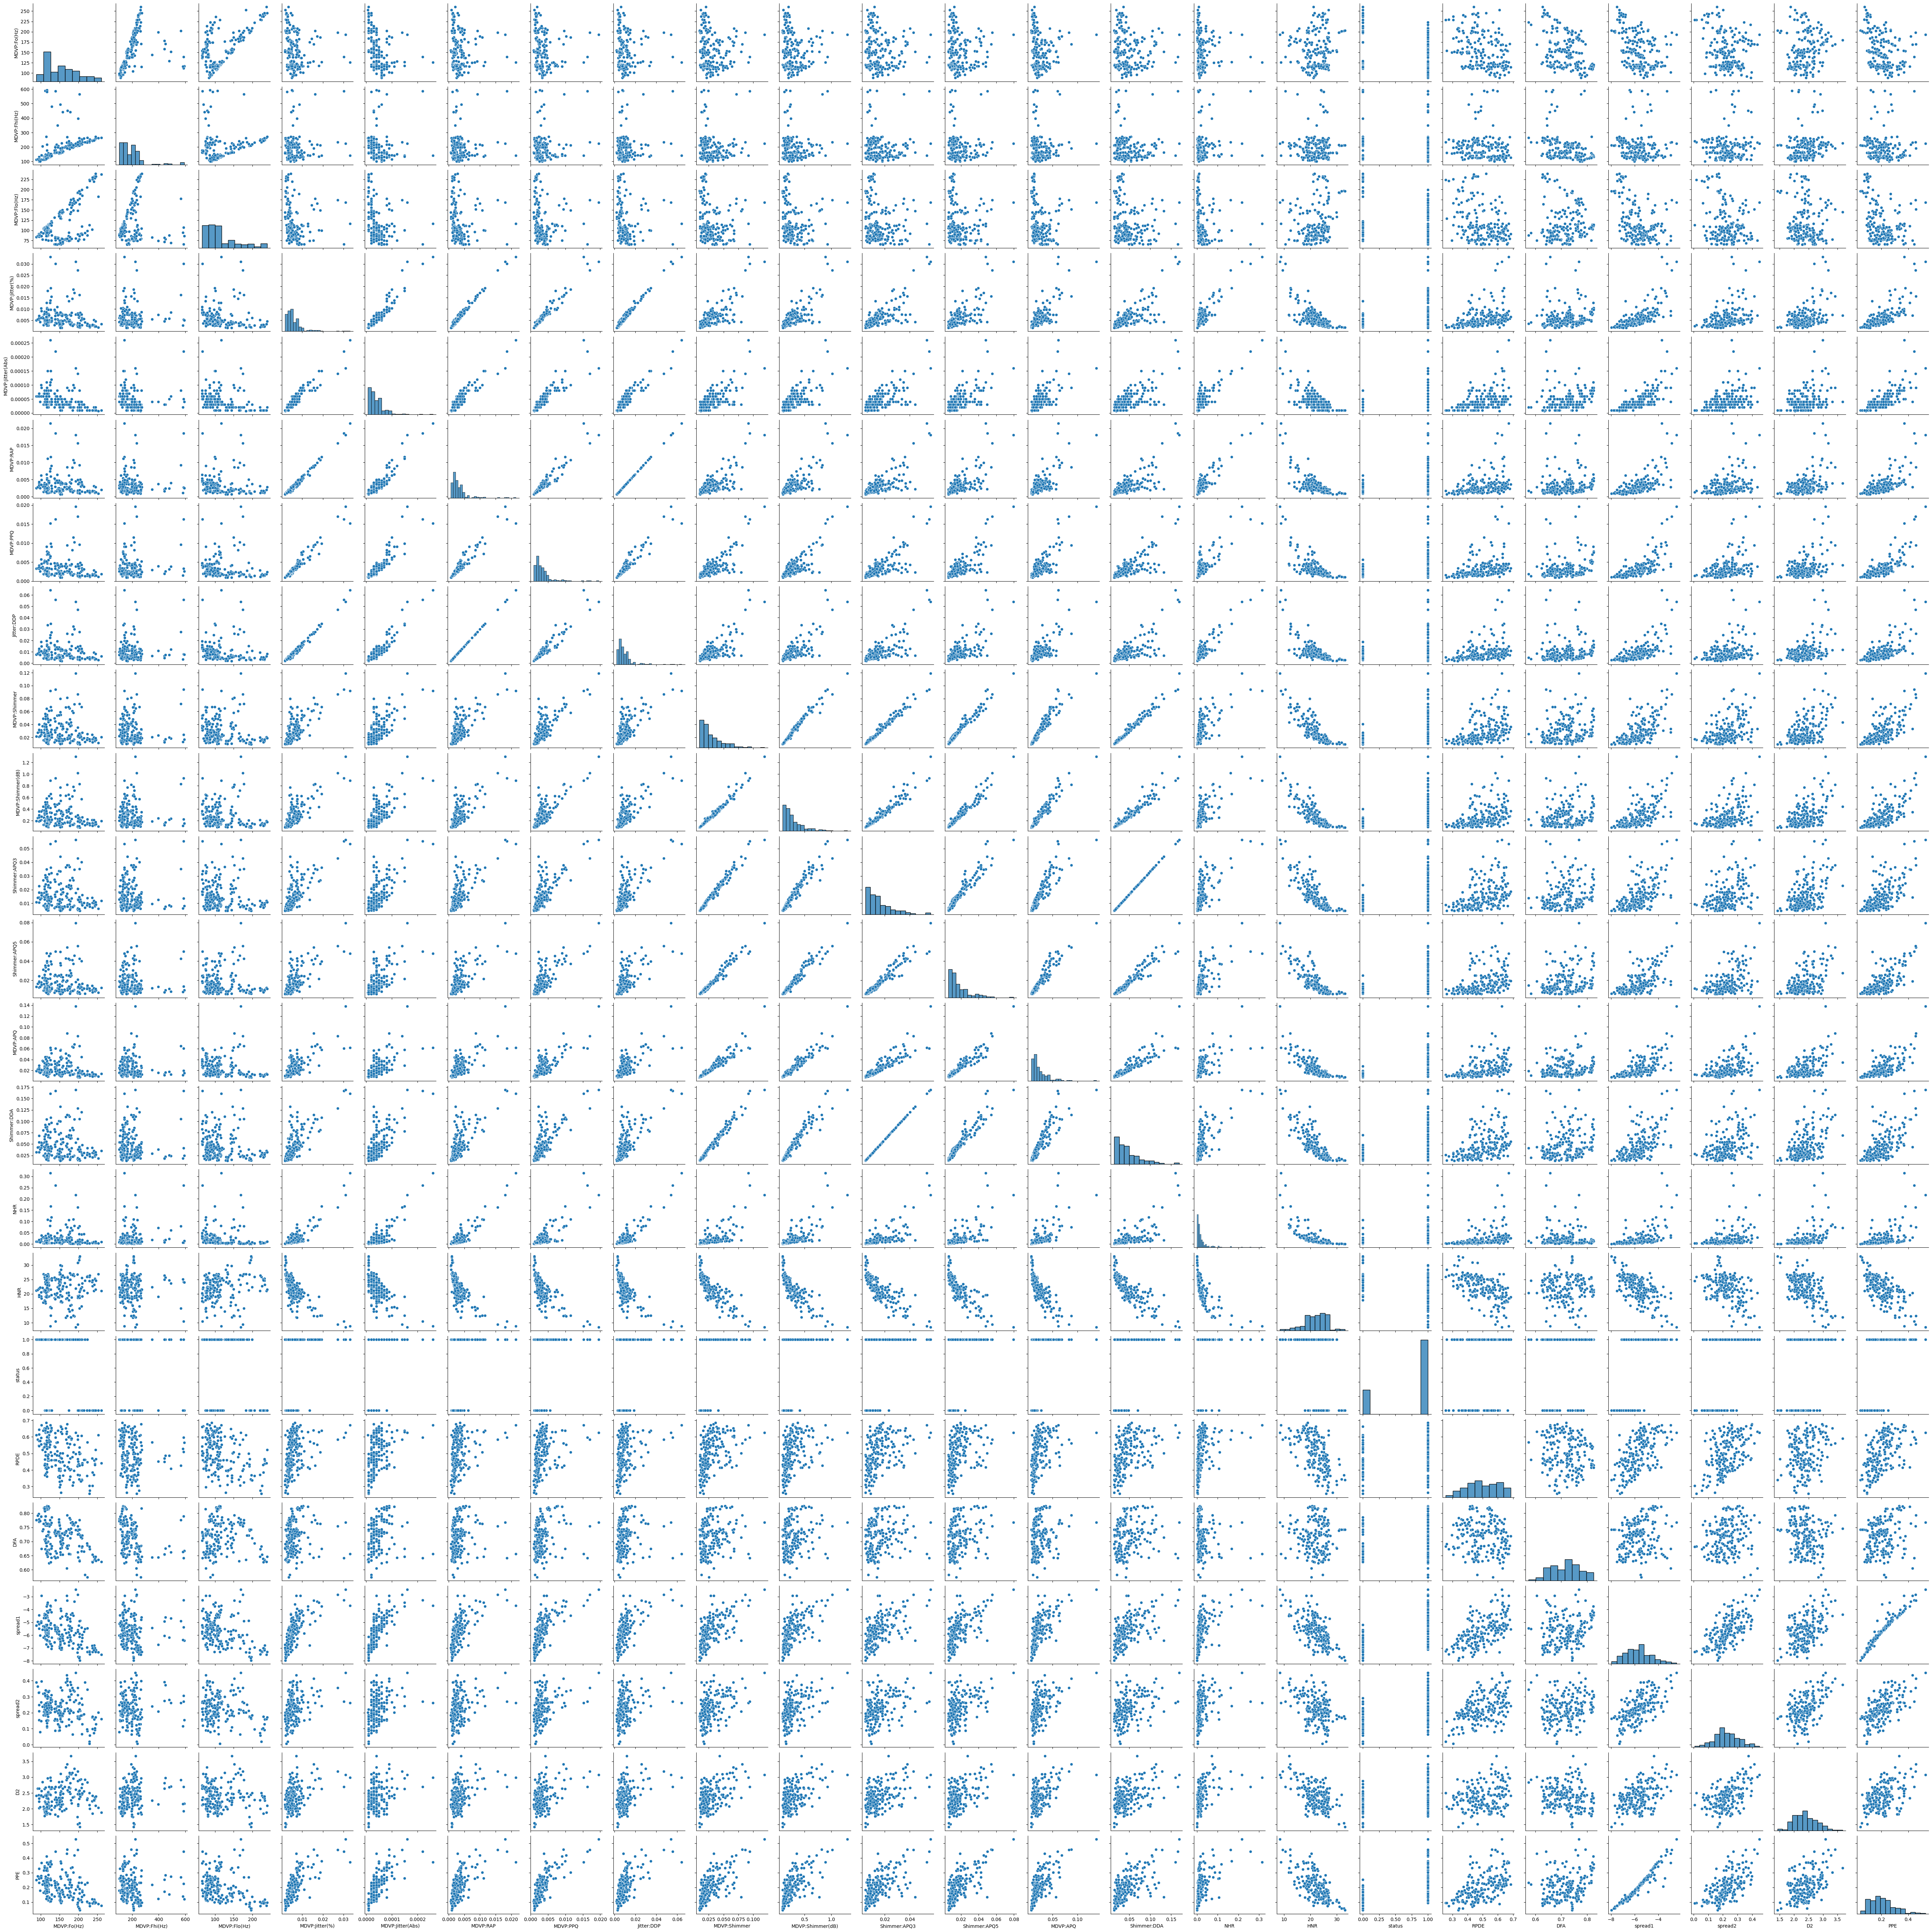

In [34]:
sns.pairplot(data=df)

# Feature Engineering


In [35]:
# Dataset Balace Using SMOTE 

df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [36]:
X = df.drop('status' , axis=1)
y = df['status']

In [37]:
X

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
0               0.426  ...   0.02971      0.06545  0.02211  21.033  0.414783   
1               0.626  ...   0.04368      0.09403  0.01929  19.085  0.458359   
2               0.482  ...   0.03590      0.08270  0.01309  20.651  0.429895   
3               0.517  ...   0.03772      0.08771  0.01353  20.644  0.434969   
4               0.584  ...   0.04465      0.10470  0.01767  19.649  0.417356   
..                ...  ...       ...          ...      ...     ...       ...   
190             0.405  ...   0.02745      0.07008  0.02764  19.517  0.448439   
191             0.263  ...   0.01879      0.04812  0.01810  19.147  0.431674   
192             0.256  ...   0.01667      0.03804  0.10715  17.883  0.407567   
193             0.241  ...   0.01588      0.03794  0.07223  19.020  0.451221   
194             0.190  ...   0.01373      0.03078  0.04398  21.209  0.462803   

          DFA   spread1   spread2        D2       PPE  
0    0.815285 -4.813031  0.266482  2.301442  0.284654  
1    0.819521 -4.075192  0.335590  2.486855  0.368674  
2    0.825288 -4.443179  0.311173  2.342259  0.332634  
3    0.819235 -4.117501  0.334147  2.405554  0.368975  
4    0.823484 -3.747787  0.234513  2.332180  0.410335  
..        ...       ...       ...       ...       ...  
190  0.657899 -6.538586  0.121952  2.657476  0.133050  
191  0.683244 -6.195325  0.129303  2.784312  0.168895  
192  0.655683 -6.787197  0.158453  2.679772  0.131728  
193  0.643956 -6.744577  0.207454  2.138608  0.123306  
194  0.664357 -5.724056  0.190667  2.555477  0.148569  

[195 rows x 22 columns]

In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: uint8

- we are use of SMOTE to Oversample and Balance the dataset.

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 50)


In [41]:
X , y = sm.fit_resample(X,y)

In [42]:
y.value_counts()

status
1    147
0    147
Name: count, dtype: int64

In [43]:
# Split data into Train and test part 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [45]:
# Scaling the feature using Standard Scaler 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train.shape , X_test.shape

((235, 22), (59, 22))

In [47]:
y_train.shape , y_test.shape

((235,), (59,))

# Model Building 

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

Accuracy :  0.864406779661017
[[25  3]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.84      0.87        31

    accuracy                           0.86        59
   macro avg       0.86      0.87      0.86        59
weighted avg       0.87      0.86      0.86        59



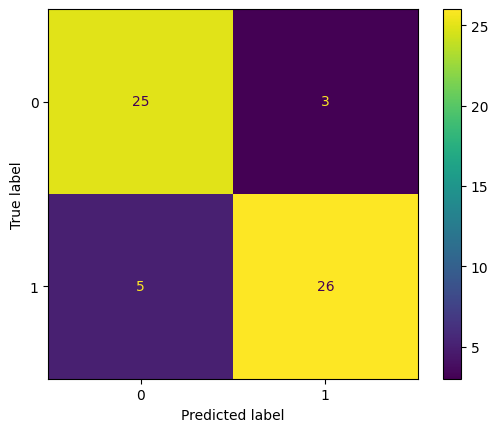

In [50]:
log = LogisticRegression()

log.fit(X_train , y_train)

y_pred_log = log.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_log , y_test))
print(confusion_matrix(y_pred_log , y_test))
print(classification_report(y_pred_log , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_log , y_test))
cm.plot()

Accuracy :  0.9322033898305084
[[28  2]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



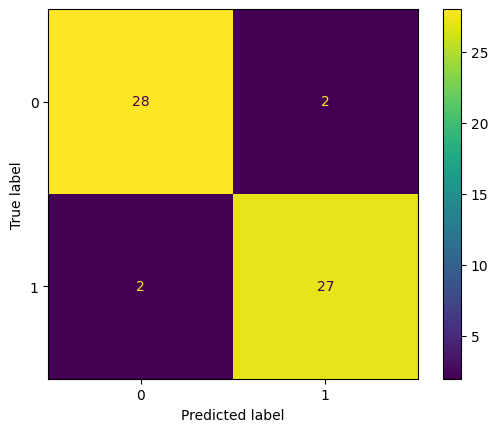

In [52]:
tree = DecisionTreeClassifier()

tree.fit(X_train , y_train)

y_pred_tree = tree.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_tree , y_test))
print(confusion_matrix(y_pred_tree , y_test))
print(classification_report(y_pred_tree , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_tree , y_test))
cm.plot()

In [54]:
# Hyper parameter Tuning 

parameter = {
     'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
parameter

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': range(1, 10),
 'random_state': range(30, 210, 30),
 'criterion': ['gini', 'entropy']}

In [55]:
tree_clf = GridSearchCV(estimator=tree , param_grid=parameter , cv = 5 , verbose=True)
tree_clf.fit(X_train , y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\brije\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\brije\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\brije\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\brije\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\brije\venv\lib\site-packages\sklearn\utils\_param_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)},
             verbose=True)

In [56]:
tree_clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 30}

In [57]:
tree_clf.best_score_

0.9234042553191489

Accuracy :  0.9322033898305084
[[28  2]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



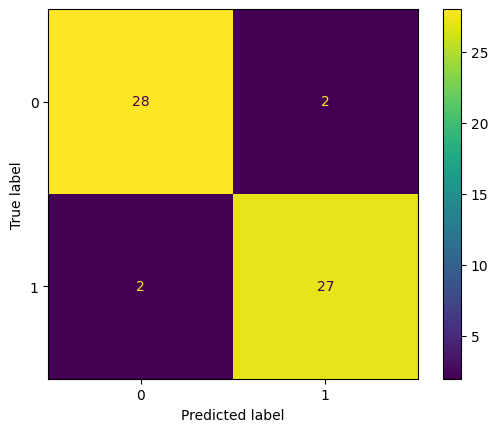

In [61]:
dt = DecisionTreeClassifier(criterion='gini' , max_depth=6 , max_features= 'sqrt' , random_state=30)

dt.fit(X_train , y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_dt , y_test))
print(confusion_matrix(y_pred_dt , y_test))
print(classification_report(y_pred_dt , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_dt , y_test))
cm.plot()

Accuracy :  0.9491525423728814
[[27  0]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.91      0.95        32

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



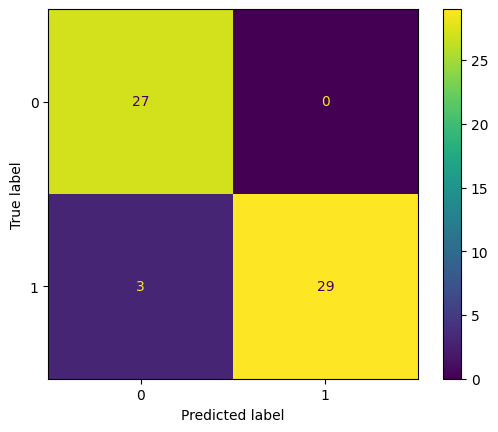

In [63]:
svc = SVC()

svc.fit(X_train , y_train)

y_pred_svc = svc.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_svc , y_test))
print(confusion_matrix(y_pred_svc , y_test))
print(classification_report(y_pred_svc , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_svc , y_test))
cm.plot()

In [64]:
# Hyper Perameter Tuning 

parameter = {'kernel':['linear','rbf','poly'],
            'C': [0.5, 1, 10, 100],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
            }
parameter

{'kernel': ['linear', 'rbf', 'poly'],
 'C': [0.5, 1, 10, 100],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [65]:
svc_clf = GridSearchCV(estimator=svc , param_grid=parameter , cv=5 , verbose=True)
svc_clf.fit(X_train , y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=True)

In [66]:
svc_clf.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [67]:
svc_clf.best_score_

0.948936170212766

Accuracy :  1.0
[[30  0]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



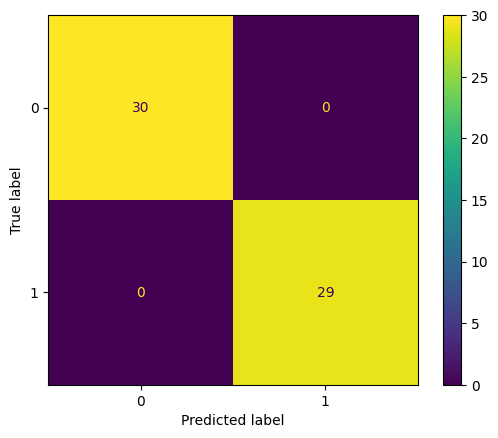

In [68]:
svc = SVC(C=100 , gamma=0.1 , kernel='rbf')
svc.fit(X_train , y_train)

y_pred_svc = svc.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_svc , y_test))
print(confusion_matrix(y_pred_svc , y_test))
print(classification_report(y_pred_svc , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_svc , y_test))
cm.plot()

Accuracy :  0.9491525423728814
[[27  0]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.91      0.95        32

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



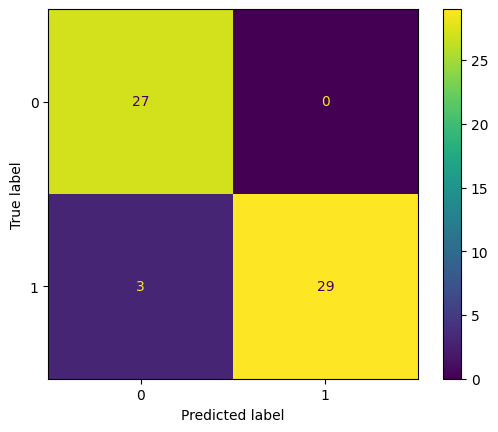

In [69]:
forest  = RandomForestClassifier()
forest.fit(X_train , y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_forest , y_test))
print(confusion_matrix(y_pred_forest , y_test))
print(classification_report(y_pred_forest , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_forest , y_test))
cm.plot()

In [71]:
parameter = {
    'n_estimators': range(100,300,25),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
parameter

{'n_estimators': range(100, 300, 25),
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': range(1, 10),
 'random_state': range(100, 250, 50),
 'criterion': ['gini', 'entropy']}

In [73]:
forest_clf = GridSearchCV(estimator=forest , param_grid=parameter , cv= 5 , verbose=True)
forest_clf.fit(X_train , y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\brije\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\brije\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\brije\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\brije\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\brije\venv\lib\site-packages\sklearn\utils\_para

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 300, 25),
                         'random_state': range(100, 250, 50)},
             verbose=True)

In [74]:
forest_clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 200}

In [75]:
forest_clf.best_score_

0.9446808510638298

Accuracy :  0.9661016949152542
[[28  0]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        31

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



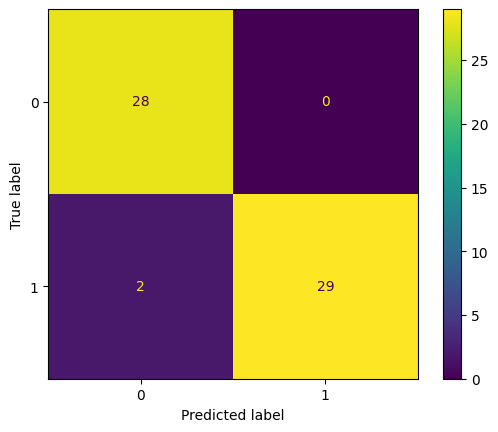

In [77]:
forest  = RandomForestClassifier(criterion='gini' , max_depth=8 , max_features='sqrt' , n_estimators=100 , random_state=200)
forest.fit(X_train , y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy : " , accuracy_score(y_pred_forest , y_test))
print(confusion_matrix(y_pred_forest , y_test))
print(classification_report(y_pred_forest , y_test))

cm = ConfusionMatrixDisplay(confusion_matrix(y_pred_forest , y_test))
cm.plot()

In [78]:
from sklearn.metrics import f1_score, recall_score, precision_score

results = []
results.append({
    'ML_Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_pred_log, y_test),
    'f1_score': f1_score(y_pred_log, y_test),
    'Recall': recall_score(y_pred_log, y_test),
    'Precision': precision_score(y_pred_log, y_test)
})
results.append({
    'ML_Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_pred_dt, y_test),
    'f1_score': f1_score(y_pred_dt, y_test),
    'Recall': recall_score(y_pred_dt, y_test),
    'Precision': precision_score(y_pred_dt, y_test)
})
results.append({
    'ML_Model': 'SVC',
    'Accuracy': accuracy_score(y_pred_svc, y_test),
    'f1_score': f1_score(y_pred_svc, y_test),
    'Recall': recall_score(y_pred_svc, y_test),
    'Precision': precision_score(y_pred_svc, y_test)
})
results.append({
    'ML_Model': 'Random Forest',
    'Accuracy': accuracy_score(y_pred_forest, y_test),
    'f1_score': f1_score(y_pred_forest, y_test),
    'Recall': recall_score(y_pred_forest, y_test),
    'Precision': precision_score(y_pred_forest, y_test)
})



summary_df = pd.DataFrame(results)
summary_df

ML_Model  Accuracy  f1_score    Recall  Precision
0  Logistic Regression  0.864407  0.866667  0.838710   0.896552
1        Decision Tree  0.932203  0.931034  0.931034   0.931034
2                  SVC  1.000000  1.000000  1.000000   1.000000
3        Random Forest  0.966102  0.966667  0.935484   1.000000

In [79]:
summary_df = summary_df.sort_values(['Accuracy', 'f1_score'], ascending=False).reset_index(drop=True)

In [80]:
summary_df

ML_Model  Accuracy  f1_score    Recall  Precision
0                  SVC  1.000000  1.000000  1.000000   1.000000
1        Random Forest  0.966102  0.966667  0.935484   1.000000
2        Decision Tree  0.932203  0.931034  0.931034   0.931034
3  Logistic Regression  0.864407  0.866667  0.838710   0.896552

In [81]:
joblib.dump(svc , 'svc.pkl')

['svc.pkl']